This program first opens the fits image and load the data into a variable. Afterwards, it extracts the backgorund data, find the noise, then subtract the background noise from the data using the sep.Background function suite. Afterwards. it uses the sep.extract function to find objects within the "clean" image data and highlighting those objects using matplotlib's Ellipse feature. Lastly,

In [2]:
import numpy as np
import sep
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse
import astropy
from astropy.io import fits
import fitsio

In [3]:
%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

with fits.open('image.fits') as hdul:
    data = hdul[0].data

#data_changed = data.astype(data.dtype.newbyteorder('='))
bkg = sep.Background(data)
bkg_image = bkg.back()
bkg_rms = bkg.rms()
data_sub = data - bkg

objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138


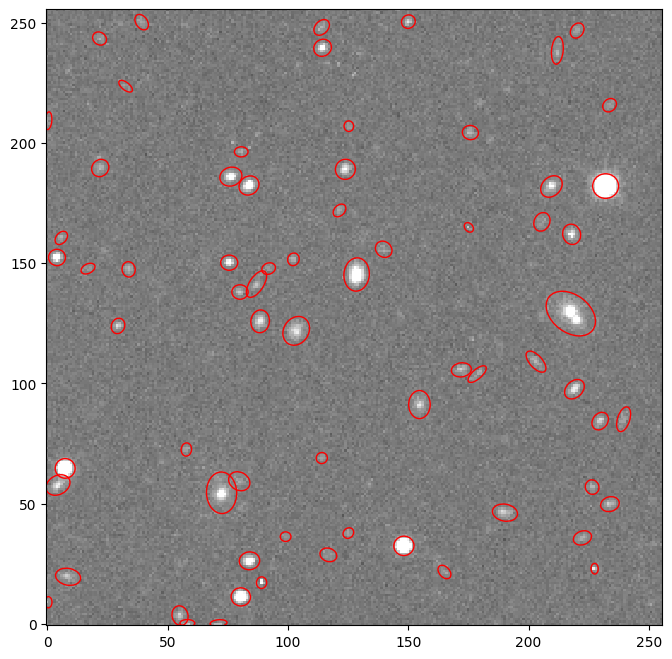

In [4]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.title("Initial Data")
plt.savefig("example_initial_plot.png")
plt.close()

plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.title("Background")
plt.savefig("example_background_plot.png")
plt.close()

plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.title("Background Noise")
plt.savefig("example_background_noise_plot.png")
plt.close()

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig("example_object_detect_plot.png")